In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2

In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='softmax'))  


In [3]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
from tensorflow.keras.models import load_model
model = load_model('VGG16.h5')

In [5]:
img_path = 'Alzheimer_s Dataset/test/VeryMildDemented/26 (49).jpg'
img = load_img(img_path,target_size = (224,224))
x = image.img_to_array(img)
x=x/255
x.shape
img = x.reshape((1,224,224,3))
img.shape
ans = model.predict(img).argmax()
ans


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step


3

### code for multiple images verification

In [6]:
# from keras.preprocessing.image import load_img, img_to_array
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# from collections import Counter

# image_folder = 'Alzheimer_s Dataset/test/VeryMildDemented'
# # image_folder = 'img'
# image_files = os.listdir(image_folder)

# image_files = image_files[:20]
# image_paths = [os.path.join(image_folder, img) for img in image_files]

# predictions = []
# confidences = []

# classifications = ["Mild Demented", "Moderate Demented", "Non Demented", "Very Mild Demented"]

# img_batch = []
# for img_path in image_paths:
#     img = load_img(img_path, target_size=(224, 224))
#     x = img_to_array(img)
#     x = x / 255.0
#     img_batch.append(x)

# img_batch = np.array(img_batch)  

# predictions_batch = model.predict(img_batch)

# for i, prediction in enumerate(predictions_batch):
#     prediction_percentages = prediction * 100
#     ans = prediction.argmax()

#     classification = classifications[ans]
#     confidence = prediction_percentages[ans]
    
#     predictions.append(classification)
#     confidences.append(confidence)

#     img_display = img_batch[i] * 255.0
#     img_display = img_display.astype(np.uint8)

#     plt.imshow(img_display)
#     plt.axis('off')
#     plt.title(f"Prediction Class: {classification}\nPrediction Confidence: {confidence:.2f}%", fontsize=16)
#     plt.show()

# for i in range(len(image_paths)):
#     print(f"Image: {image_files[i]}, Predicted Class: {predictions[i]}, Confidence: {confidences[i]:.2f}%")

# class_count = Counter(predictions)
# overall_class = class_count.most_common(1)[0][0]  

# average_confidence = np.mean(confidences)

# print(f"\nOverall Predicted Class: {overall_class}")
# print(f"Average Confidence: {average_confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Prediction percentages for each class:
Class 0: 2.33%
Class 1: 0.00%
Class 2: 1.18%
Class 3: 96.48%

Predicted class index: 3


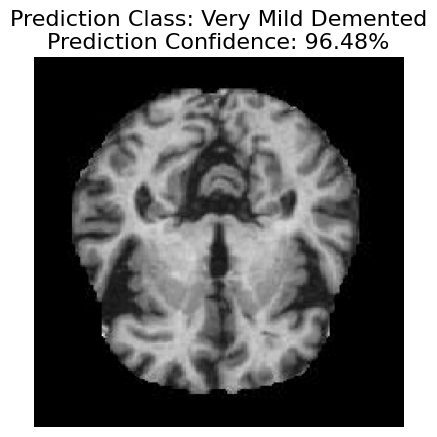

In [7]:
# img_path = 'Alzheimer_s Dataset/test/VeryMildDemented/26 (49).jpg'
# img_path = 'Alzheimer_s Dataset/train/NonDemented/NoImpairment (20).jpg'
# img_path = 'Alzheimer_s Dataset/test/MildDemented/26 (1).jpg'
# img_path = 'Alzheimer_s Dataset/test/ModerateDemented/29 (2).jpg'
img_path = 'img/img4.jpg'
img = load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = x / 255

img = x.reshape((1, 224, 224, 3))
prediction = model.predict(img)[0]
prediction_percentages = prediction * 100
ans = prediction.argmax()

print("Prediction percentages for each class:")
for i, percentage in enumerate(prediction_percentages):
    print(f"Class {i}: {percentage:.2f}%")

print(f"\nPredicted class index: {ans}")

classifications = ["Mild Demented", "Moderate Demented", "Non Demented", "Very Mild Demented"]
classification = classifications[ans]
confidence = prediction_percentages[ans]

sorted_indices = np.argsort(prediction_percentages)[::-1]
second_highest_class = classifications[sorted_indices[1]]
second_highest_confidence = prediction_percentages[sorted_indices[1]]

img = img.squeeze()  

plt.imshow(img)
plt.axis('off')  
plt.title(f"Prediction Class: {classification}\nPrediction Confidence: {confidence:.2f}%", fontsize=16)
plt.show()